## Import Libraries

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
from scipy.stats import f_oneway
import scipy.stats as stats

## Import csv files to dataframe

In [2]:
# Read the first CSV files into a DataFrame
rephrase = pd.read_csv('dataframe-rephrase.csv')
feedback= pd.read_csv('dataframe-feedback.csv')

In [3]:
rephrase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   How old are you?               49 non-null     object 
 1   What is your gender            49 non-null     object 
 2   avg_model1_fluency_cf          49 non-null     float64
 3   avg_model1_coherence_cf        49 non-null     float64
 4   avg_model1_correctness_cf      49 non-null     float64
 5   avg_model1_appropriateness_cf  49 non-null     float64
 6   avg_model2_fluency_cf          49 non-null     float64
 7   avg_model2_coherence_cf        49 non-null     float64
 8   avg_model2_correctness_cf      49 non-null     float64
 9   avg_model2_appropriateness_cf  49 non-null     float64
 10  avg_model3_fluency_cf          49 non-null     float64
 11  avg_model3_coherence_cf        49 non-null     float64
 12  avg_model3_correctness_cf      49 non-null     float

## Rephrasing Questions

### Average Performance Per Question

In [4]:
# Average Performance Per Question
model1_cols = [col for col in rephrase.columns if 'model1' in col]
model2_cols = [col for col in rephrase.columns if 'model2' in col]
model3_cols = [col for col in rephrase.columns if 'model3' in col]

# Calculating the average performance
model1_avg = rephrase[model1_cols].mean()
model2_avg = rephrase[model2_cols].mean()
model3_avg = rephrase[model3_cols].mean()


display(model1_avg)
display(model2_avg)
display(model3_avg)

avg_model1_fluency_cf            3.204082
avg_model1_coherence_cf          2.969388
avg_model1_correctness_cf        2.000000
avg_model1_appropriateness_cf    3.326531
dtype: float64

avg_model2_fluency_cf            3.234694
avg_model2_coherence_cf          2.561224
avg_model2_correctness_cf        1.938776
avg_model2_appropriateness_cf    3.193878
dtype: float64

avg_model3_fluency_cf            2.908163
avg_model3_coherence_cf          2.979592
avg_model3_correctness_cf        1.857143
avg_model3_appropriateness_cf    3.183673
dtype: float64

### Overall Average Performance

In [5]:
# Overall average performanc of each model 
overall_model1_avg = rephrase[model1_cols].mean().values.flatten().mean()
overall_model2_avg = rephrase[model2_cols].mean().values.flatten().mean()
overall_model3_avg = rephrase[model3_cols].mean().values.flatten().mean()

print("Overall Average Performance of OPT:", overall_model1_avg)
print("Overall Average Performance of DialoGPT:", overall_model2_avg)
print("Overall Average Performance of Gemma:", overall_model3_avg)

Overall Average Performance of OPT: 2.875
Overall Average Performance of DialoGPT: 2.732142857142857
Overall Average Performance of Gemma: 2.7321428571428577


### Average Performance by Age Group 

In [6]:
# Average performance by age group
avg_perf_age = rephrase.groupby('How old are you?')[model1_cols + model2_cols + model3_cols].mean()

# Splitting the average performance data into separate DataFrames for plotting
avg_perf_age_model1 = avg_perf_age[model1_cols]
avg_perf_age_model2 = avg_perf_age[model2_cols]
avg_perf_age_model3 = avg_perf_age[model3_cols]

# Define the color and width
color = 'thistle'
bar_width = 0.3

# Plotting the average performance for OPT per age group
data = [
    go.Bar(x=avg_perf_age_model1.index, y=avg_perf_age_model1.mean(axis=1), name='OPT', marker_color=color, width=bar_width)
]
layout = go.Layout(
    title='Average Performance of OPT by Age Group',
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Score')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Plotting the average performance for DialoGPT per age group
data = [
    go.Bar(x=avg_perf_age_model2.index, y=avg_perf_age_model2.mean(axis=1), name='DialoGPT', marker_color=color, width=bar_width)
]
layout = go.Layout(
    title='Average Performance of DialoGPT by Age Group',
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Score')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Plotting the average performance for Gemma per age group
data = [
    go.Bar(x=avg_perf_age_model3.index, y=avg_perf_age_model3.mean(axis=1), name='Gemma', marker_color=color, width=bar_width)
]
layout = go.Layout(
    title='Average Performance of Gemma by Age Group',
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Score')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

### Average Performance by Gender

In [7]:
# Group by gender 
avg_perf_gender = rephrase.groupby('What is your gender')[model1_cols + model2_cols + model3_cols].mean()

# Splitting the average performance data into separate DataFrames for plotting
avg_perf_gender_model1 = avg_perf_gender[model1_cols]
avg_perf_gender_model2 = avg_perf_gender[model2_cols]
avg_perf_gender_model3 = avg_perf_gender[model3_cols]

# Define the color and width
color = 'thistle'
bar_width = 0.3

# Plotting the average performance for OPT by gender
data = [
    go.Bar(x=avg_perf_gender_model1.index, y=avg_perf_gender_model1.mean(axis=1), name='OPT', marker_color=color, width=bar_width)
]
layout = go.Layout(
    title='Average Performance of OPT by Gender',
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Score')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Plotting the average performance for DialoGPT per age group
data = [
    go.Bar(x=avg_perf_gender_model2.index, y=avg_perf_gender_model2.mean(axis=1), name='DialoGPT', marker_color=color, width=bar_width)
]
layout = go.Layout(
    title='Average Performance of DialoGPT by Gender',
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Score')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Plotting the average performance for Gemma per age group
data = [
    go.Bar(x=avg_perf_gender_model3.index, y=avg_perf_gender_model3.mean(axis=1), name='Gemma', marker_color=color, width=bar_width)
]
layout = go.Layout(
    title='Average Performance of Gemma by Gender',
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Score')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

avg_model1_fluency_cf - Shapiro-Wilk Test: W-Statistic=0.9238784313201904, P-value=0.00365092302672565


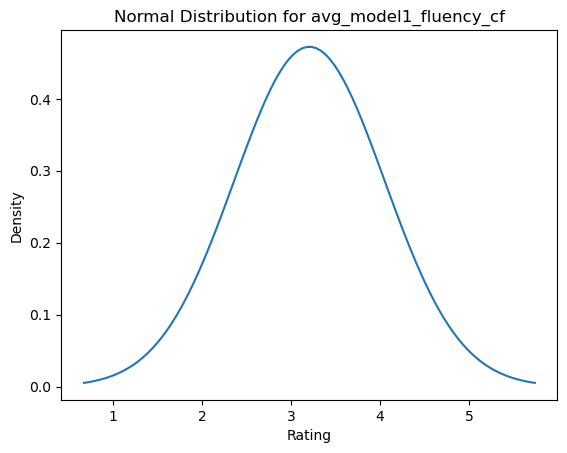

avg_model1_coherence_cf - Shapiro-Wilk Test: W-Statistic=0.9255980253219604, P-value=0.004218236543238163


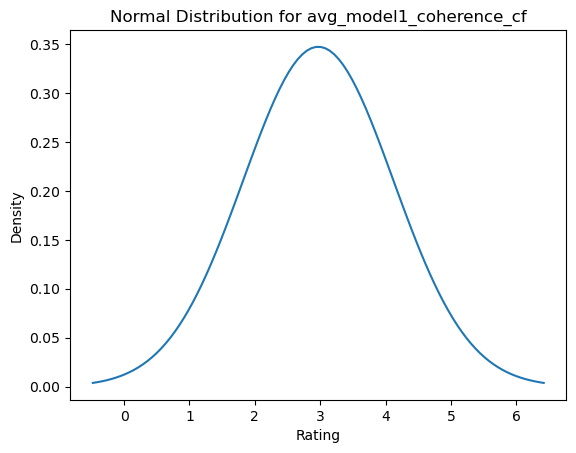

avg_model1_correctness_cf - Shapiro-Wilk Test: W-Statistic=0.877670407295227, P-value=0.00011070653272327036


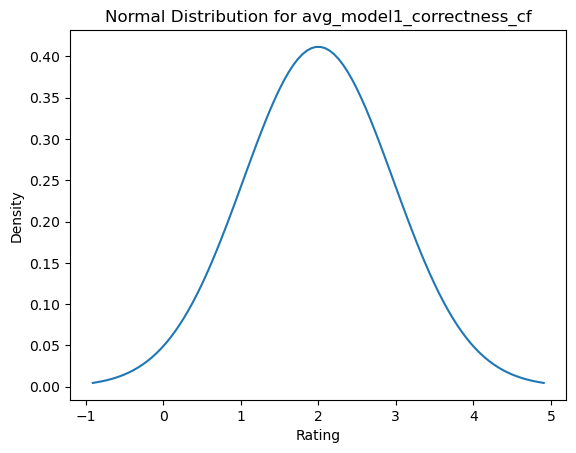

avg_model1_appropriateness_cf - Shapiro-Wilk Test: W-Statistic=0.924322783946991, P-value=0.0037893634289503098


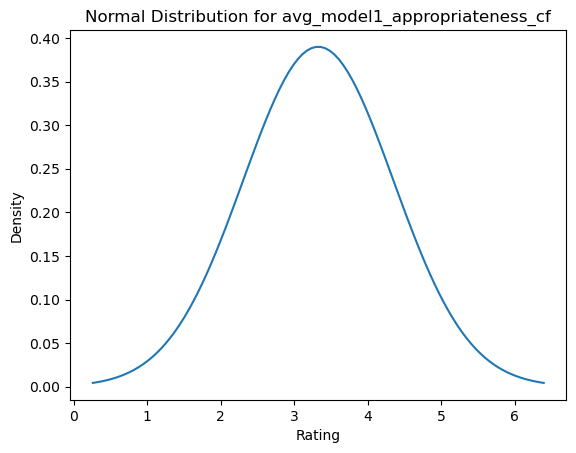

avg_model2_fluency_cf - Shapiro-Wilk Test: W-Statistic=0.9245330691337585, P-value=0.003856794210150838


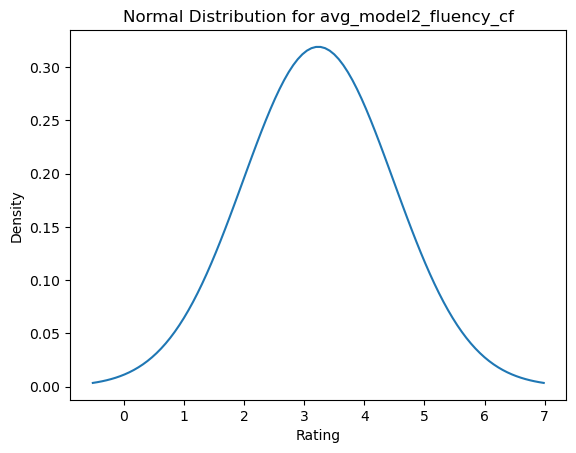

avg_model2_coherence_cf - Shapiro-Wilk Test: W-Statistic=0.9455195069313049, P-value=0.024404125288128853


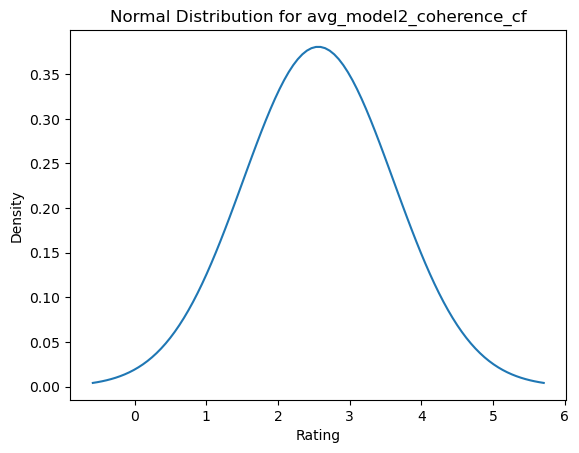

avg_model2_correctness_cf - Shapiro-Wilk Test: W-Statistic=0.8778284788131714, P-value=0.0001119120788644068


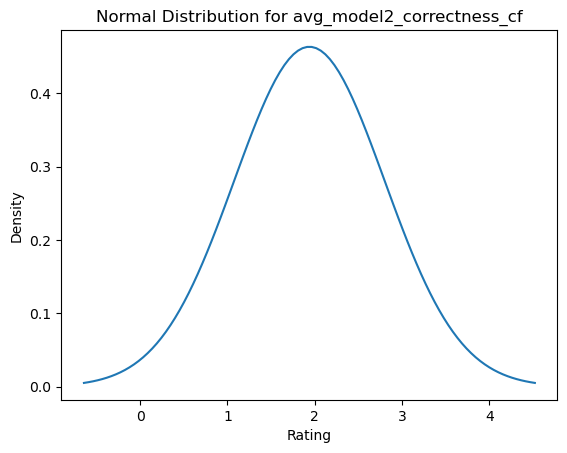

avg_model2_appropriateness_cf - Shapiro-Wilk Test: W-Statistic=0.9422630667686462, P-value=0.018133394420146942


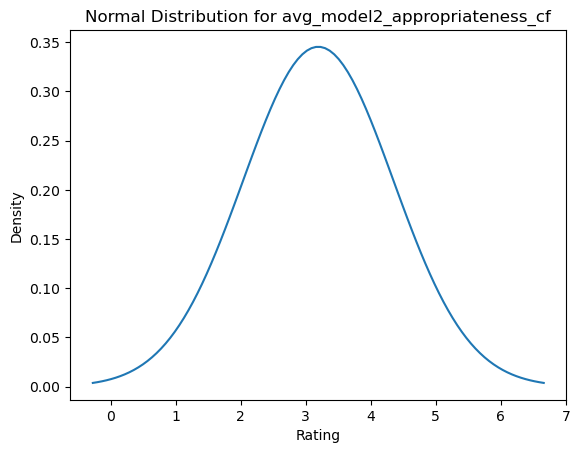

avg_model3_fluency_cf - Shapiro-Wilk Test: W-Statistic=0.9393583536148071, P-value=0.013957522809505463


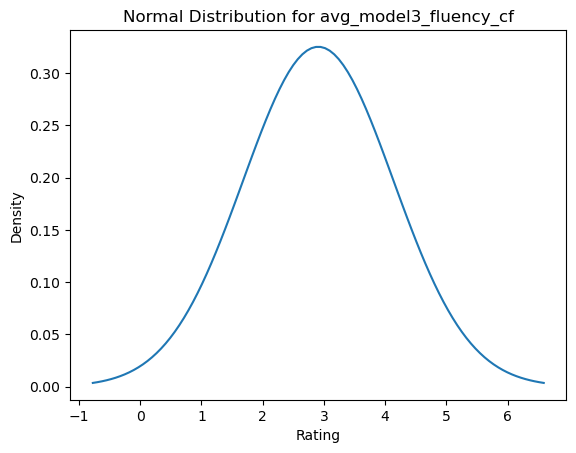

avg_model3_coherence_cf - Shapiro-Wilk Test: W-Statistic=0.9399329423904419, P-value=0.014695601537823677


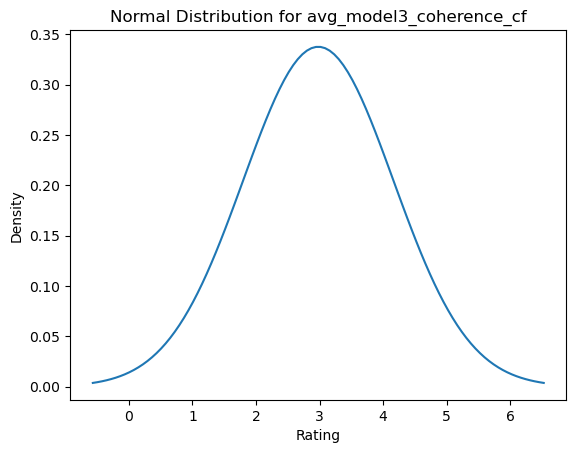

avg_model3_correctness_cf - Shapiro-Wilk Test: W-Statistic=0.8687263131141663, P-value=6.063305772840977e-05


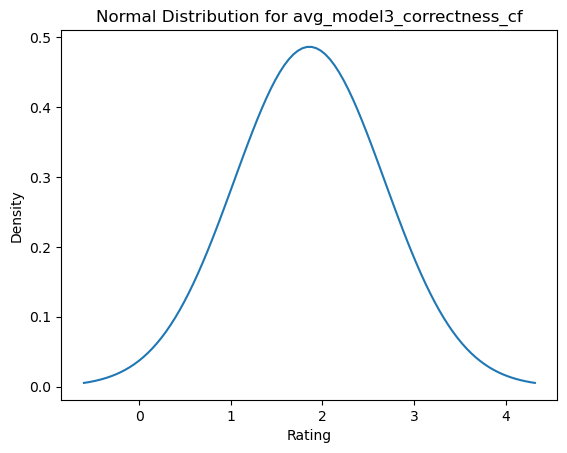

avg_model3_appropriateness_cf - Shapiro-Wilk Test: W-Statistic=0.9357526302337646, P-value=0.010129659436643124


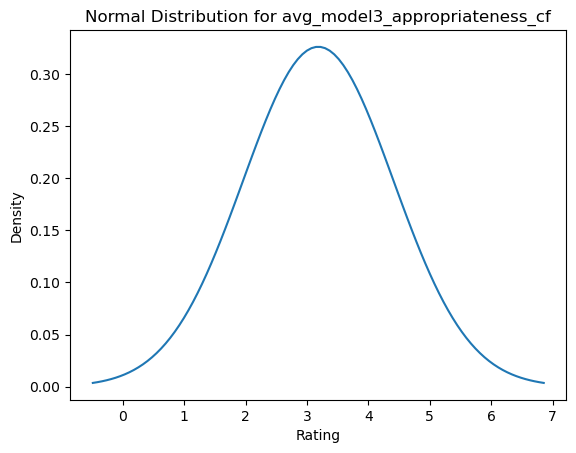

In [8]:
# Function to plot the normal distribution
def plot_normal_dist(data, title):
    mu, sigma = np.mean(data), np.std(data)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    plt.title(title)
    plt.xlabel('Rating')
    plt.ylabel('Density')
    plt.show()

# Checking for normality and plotting
for col in model1_cols + model2_cols + model3_cols:
    data = rephrase[col].dropna()
    shapiro_test = stats.shapiro(data)
    print(f"{col} - Shapiro-Wilk Test: W-Statistic={shapiro_test[0]}, P-value={shapiro_test[1]}")
    
    # Plot normal distribution if data is approximately normal
    if shapiro_test[1] > 0.05:  # Using p-value > 0.05 as a threshold for normality
        print(f"The data for {col} is considered to be approximately normally distributed")
    plot_normal_dist(data, f'Normal Distribution for {col}')


### ANOVA Test

In [9]:
# Function for ANOVA Test 
def perform_anova(df, columns, category):
    anova_result = f_oneway(*[df[col] for col in columns])
    f_value = anova_result.statistic
    p_value = anova_result.pvalue
    
    print(f"ANOVA F-value for {category}: {f_value}")
    print(f"ANOVA p-value for {category}: {p_value}")
    
    return f_value, p_value

# Apply function
fleuncy = ['avg_model1_fluency_cf', 'avg_model2_fluency_cf', 'avg_model3_fluency_cf']
coherence = ['avg_model1_coherence_cf', 'avg_model2_coherence_cf', 'avg_model3_coherence_cf']
correctness = ['avg_model1_correctness_cf', 'avg_model2_correctness_cf', 'avg_model3_correctness_cf']
appropriateness = ['avg_model1_appropriateness_cf', 'avg_model2_appropriateness_cf', 'avg_model3_appropriateness_cf']

f_value, p_value = perform_anova(rephrase, fleuncy, "fluency")
f_value, p_value = perform_anova(rephrase, coherence, "coherence")
f_value, p_value = perform_anova(rephrase, correctness, "correctness")
f_value, p_value = perform_anova(rephrase, appropriateness, "appropriateness")

ANOVA F-value for fluency: 1.238053292226382
ANOVA p-value for fluency: 0.2930155842839154
ANOVA F-value for coherence: 2.149077812943359
ANOVA p-value for coherence: 0.12031657134347451
ANOVA F-value for correctness: 0.31430846827714376
ANOVA p-value for correctness: 0.7307934495229679
ANOVA F-value for appropriateness: 0.2358374053589647
ANOVA p-value for appropriateness: 0.790213590995337


## Feedback on Question Answer 

### Average Performance Per Question

In [10]:
# Average Performance Per Question
model1_cols_f = [col for col in feedback.columns if 'model1' in col]
model2_cols_f = [col for col in feedback.columns if 'model2' in col]
model3_cols_f = [col for col in feedback.columns if 'model3' in col]

# Calculating the average performance
model1_avg_f = feedback[model1_cols_f].mean()
model2_avg_f = feedback[model2_cols_f].mean()
model3_avg_f = feedback[model3_cols_f].mean()


display(model1_avg_f)
display(model2_avg_f)
display(model3_avg_f)

avg_model1_fluency_f            2.897959
avg_model1_coherence_f          2.897959
avg_model1_correctness_f        2.551020
avg_model1_appropriateness_f    3.193878
dtype: float64

avg_model2_fluency_f            2.816327
avg_model2_coherence_f          2.040816
avg_model2_correctness_f        1.795918
avg_model2_appropriateness_f    2.897959
dtype: float64

avg_model3_fluency_f            2.561224
avg_model3_coherence_f          2.683673
avg_model3_correctness_f        2.346939
avg_model3_appropriateness_f    3.000000
dtype: float64

### Overall Average Performance

In [11]:
overall_model1_avg_f = feedback[model1_cols_f].mean().values.flatten().mean()
overall_model2_avg_f= feedback[model2_cols_f].mean().values.flatten().mean()
overall_model3_avg_f = feedback[model3_cols_f].mean().values.flatten().mean()

print("Overall Average Performance of OPT:", overall_model1_avg_f)
print("Overall Average Performance of DialoGPT:", overall_model2_avg_f)
print("Overall Average Performance of Gemma:", overall_model3_avg_f)

Overall Average Performance of OPT: 2.885204081632653
Overall Average Performance of DialoGPT: 2.3877551020408165
Overall Average Performance of Gemma: 2.6479591836734695


### Average Performance by Age Group 

In [12]:
# Group by age 
avg_perf_age = feedback.groupby('How old are you?')[model1_cols_f + model2_cols_f + model3_cols_f].mean()

# Splitting the average performance data into separate DataFrames for plotting
avg_perf_age_model1 = avg_perf_age[model1_cols_f]
avg_perf_age_model2 = avg_perf_age[model2_cols_f]
avg_perf_age_model3 = avg_perf_age[model3_cols_f]

# Define the color and width
color = 'thistle'
bar_width = 0.3

# Plotting the average performance for OPT per age group
data = [
    go.Bar(x=avg_perf_age_model1.index, y=avg_perf_age_model1.mean(axis=1), name='OPT', marker_color=color, width=bar_width)
]
layout = go.Layout(
    title='Average Performance of OPT by Age Group',
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Score')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Plotting the average performance for DialoGPT per age group
data = [
    go.Bar(x=avg_perf_age_model2.index, y=avg_perf_age_model2.mean(axis=1), name='DialoGPT', marker_color=color, width=bar_width)
]
layout = go.Layout(
    title='Average Performance of DialoGPT by Age Group',
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Score')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Plotting the average performance for Gemma per age group
data = [
    go.Bar(x=avg_perf_age_model3.index, y=avg_perf_age_model3.mean(axis=1), name='Gemma', marker_color=color, width=bar_width)
]
layout = go.Layout(
    title='Average Performance of Gemma by Age Group',
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Score')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

### Average Performance by Gender

In [13]:
# Grouping by gender and calculating the average scores for each assistant
avg_perf_gender = feedback.groupby('What is your gender')[model1_cols_f + model2_cols_f + model3_cols_f].mean()

# Splitting the average performance data into separate DataFrames for plotting
avg_perf_gender_model1 = avg_perf_gender[model1_cols_f]
avg_perf_gender_model2 = avg_perf_gender[model2_cols_f]
avg_perf_gender_model3 = avg_perf_gender[model3_cols_f]

# Define the color and width
color = 'thistle'
bar_width = 0.3

# Plotting the average performance for OPT by gender
data = [
    go.Bar(x=avg_perf_gender_model1.index, y=avg_perf_gender_model1.mean(axis=1), name='OPT', marker_color=color, width=bar_width)
]
layout = go.Layout(
    title='Average Performance of OPT by Gender',
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Score')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Plotting the average performance for DialoGPT per age group
data = [
    go.Bar(x=avg_perf_gender_model2.index, y=avg_perf_gender_model2.mean(axis=1), name='DialoGPT', marker_color=color, width=bar_width)
]
layout = go.Layout(
    title='Average Performance of DialoGPT by Gender',
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Score')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Plotting the average performance for Gemma per age group
data = [
    go.Bar(x=avg_perf_gender_model3.index, y=avg_perf_gender_model3.mean(axis=1), name='Gemma', marker_color=color, width=bar_width)
]
layout = go.Layout(
    title='Average Performance of Gemma by Gender',
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Score')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

avg_model1_fluency_cf - Shapiro-Wilk Test: W-Statistic=0.9238784313201904, P-value=0.00365092302672565


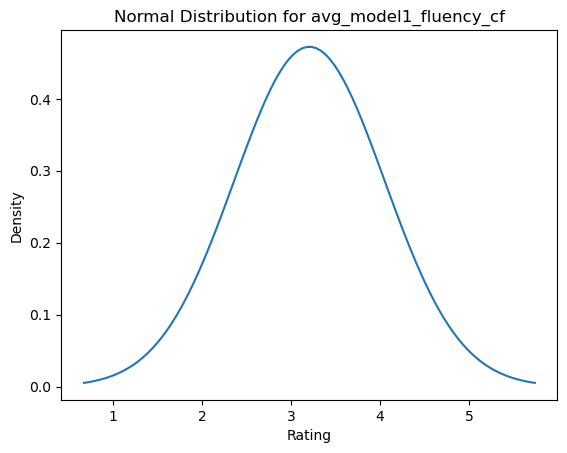

avg_model1_coherence_cf - Shapiro-Wilk Test: W-Statistic=0.9255980253219604, P-value=0.004218236543238163


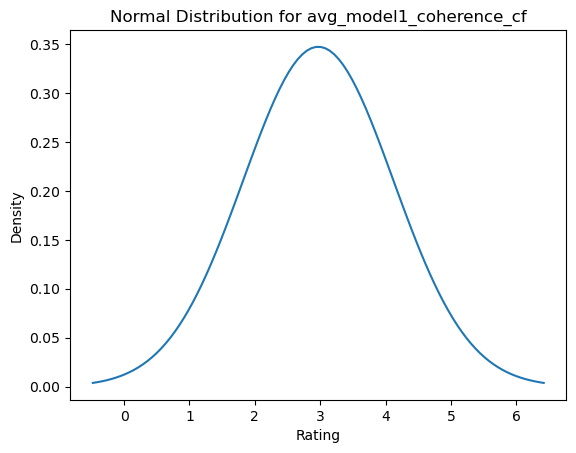

avg_model1_correctness_cf - Shapiro-Wilk Test: W-Statistic=0.877670407295227, P-value=0.00011070653272327036


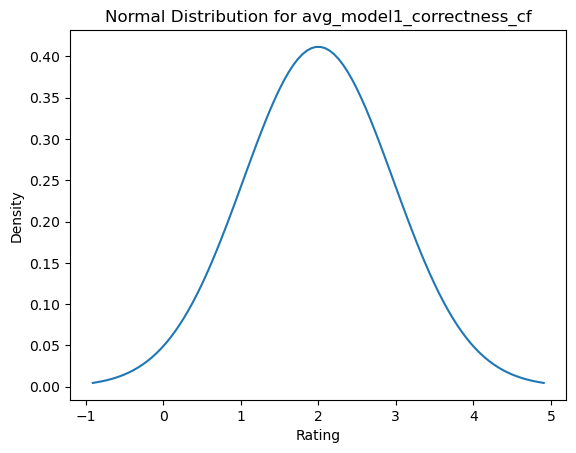

avg_model1_appropriateness_cf - Shapiro-Wilk Test: W-Statistic=0.924322783946991, P-value=0.0037893634289503098


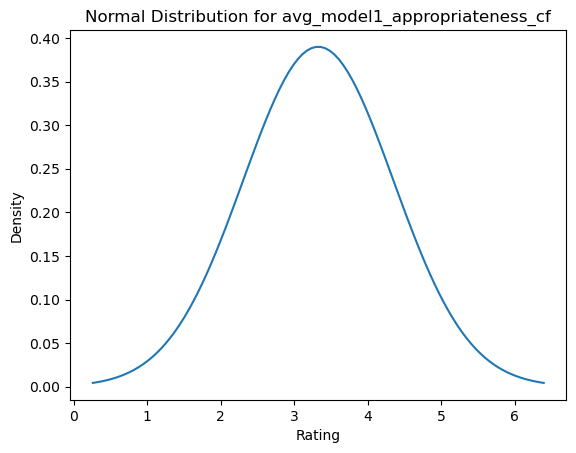

avg_model2_fluency_cf - Shapiro-Wilk Test: W-Statistic=0.9245330691337585, P-value=0.003856794210150838


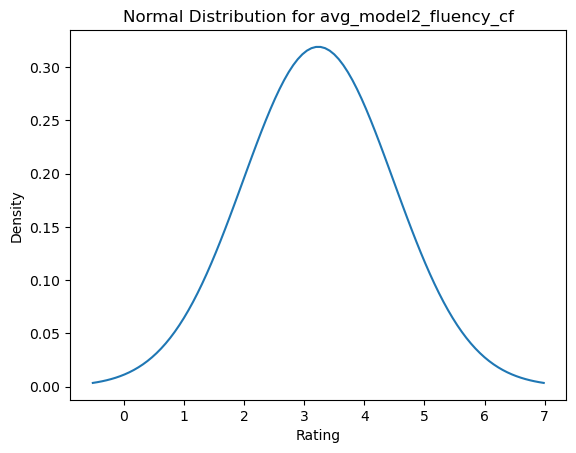

avg_model2_coherence_cf - Shapiro-Wilk Test: W-Statistic=0.9455195069313049, P-value=0.024404125288128853


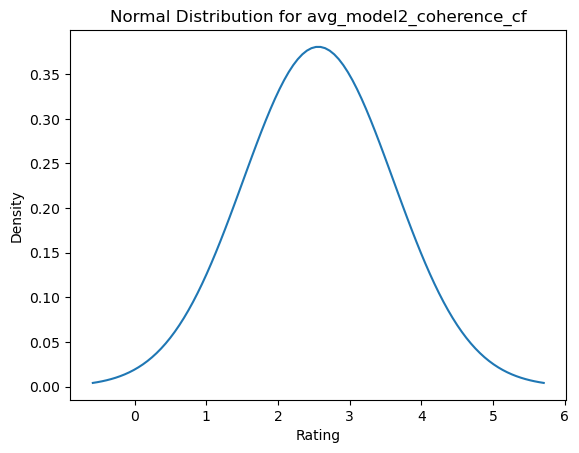

avg_model2_correctness_cf - Shapiro-Wilk Test: W-Statistic=0.8778284788131714, P-value=0.0001119120788644068


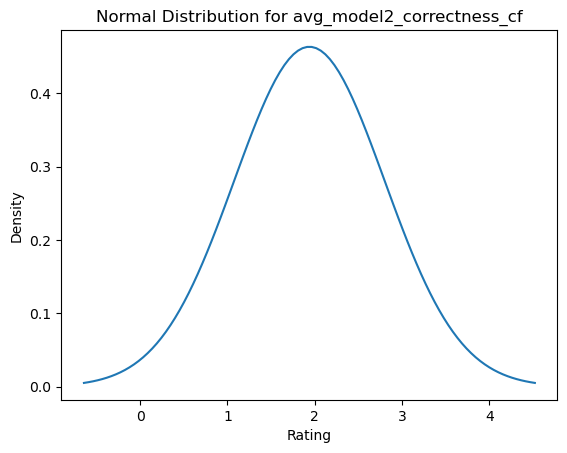

avg_model2_appropriateness_cf - Shapiro-Wilk Test: W-Statistic=0.9422630667686462, P-value=0.018133394420146942


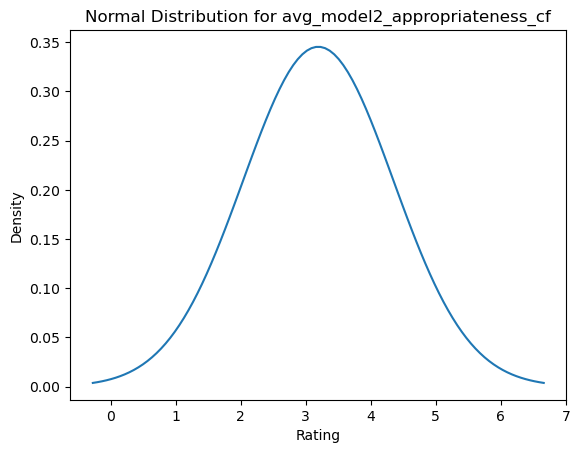

avg_model3_fluency_cf - Shapiro-Wilk Test: W-Statistic=0.9393583536148071, P-value=0.013957522809505463


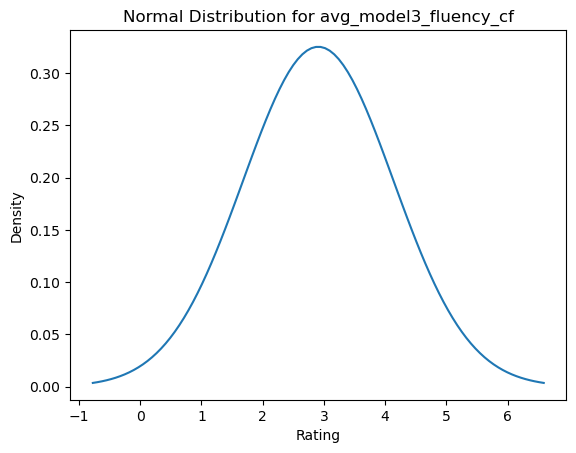

avg_model3_coherence_cf - Shapiro-Wilk Test: W-Statistic=0.9399329423904419, P-value=0.014695601537823677


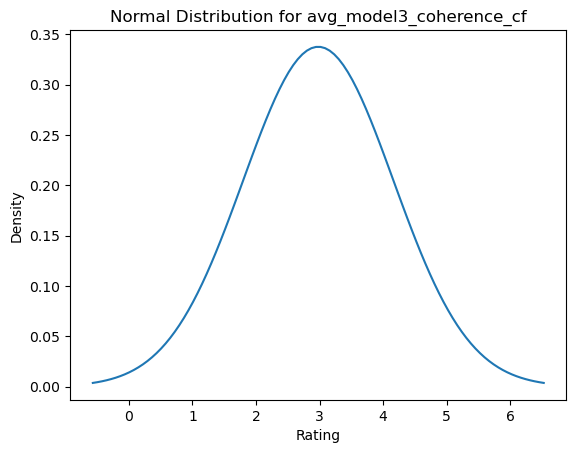

avg_model3_correctness_cf - Shapiro-Wilk Test: W-Statistic=0.8687263131141663, P-value=6.063305772840977e-05


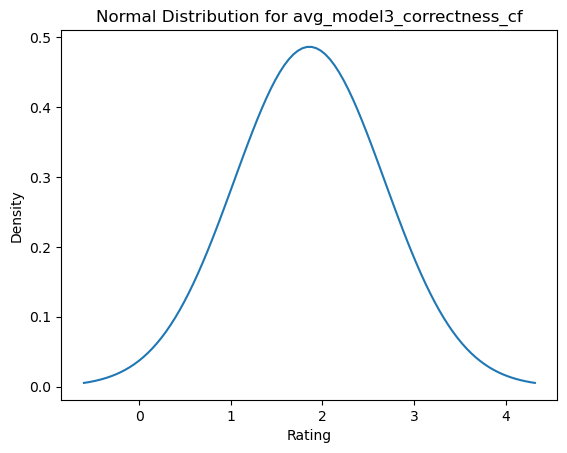

avg_model3_appropriateness_cf - Shapiro-Wilk Test: W-Statistic=0.9357526302337646, P-value=0.010129659436643124


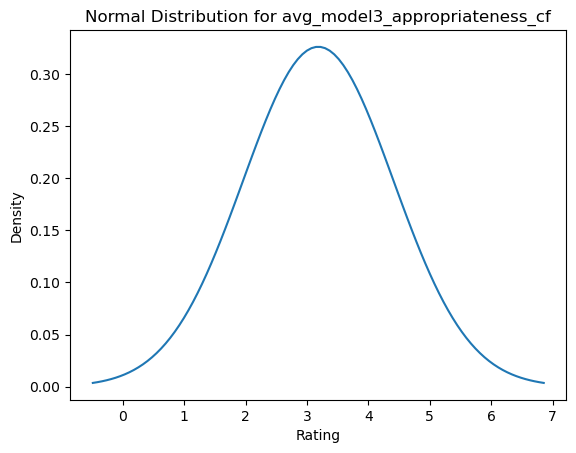

In [14]:
# Function to plot the normal distribution
def plot_normal_dist(data, title):
    mu, sigma = np.mean(data), np.std(data)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    plt.title(title)
    plt.xlabel('Rating')
    plt.ylabel('Density')
    plt.show()

# Checking for normality and plotting
for col in model1_cols + model2_cols + model3_cols:
    data = rephrase[col].dropna()
    shapiro_test = stats.shapiro(data)
    print(f"{col} - Shapiro-Wilk Test: W-Statistic={shapiro_test[0]}, P-value={shapiro_test[1]}")
    
    # Plot normal distribution if data is approximately normal
    # Conversely, if the p-value is high (greater than 0.05), it suggests that obtaining the observed result is quite likely under the assumption of normality. Therefore, you do not have enough evidence to reject the null hypothesis, and you would conclude that the data is approximately normally distributed.
    if shapiro_test[1] > 0.05:  # Using p-value > 0.05 as a threshold for normality
        print(f"The data for {col} is considered to be approximately normally distributed")
    plot_normal_dist(data, f'Normal Distribution for {col}')


### ANOVA Test

In [15]:
# Apply function
fleuncy_f = ['avg_model1_fluency_f', 'avg_model2_fluency_f', 'avg_model3_fluency_f']
coherence_f = ['avg_model1_coherence_f', 'avg_model2_coherence_f', 'avg_model3_coherence_f']
correctness_f = ['avg_model1_correctness_f', 'avg_model2_correctness_f', 'avg_model3_correctness_f']
appropriateness_f = ['avg_model1_appropriateness_f', 'avg_model2_appropriateness_f', 'avg_model3_appropriateness_f']

f_value, p_value = perform_anova(feedback, fleuncy_f, "fluency")
f_value, p_value = perform_anova(feedback, coherence_f, "coherence")
f_value, p_value = perform_anova(feedback, correctness_f, "correctness")
f_value, p_value = perform_anova(feedback, appropriateness_f, "appropriateness")

ANOVA F-value for fluency: 1.0932007993031716
ANOVA p-value for fluency: 0.33790697656295166
ANOVA F-value for coherence: 7.438209536166072
ANOVA p-value for coherence: 0.0008429844410923217
ANOVA F-value for correctness: 7.027977617905674
ANOVA p-value for correctness: 0.0012238191208674399
ANOVA F-value for appropriateness: 0.8862166761202497
ANOVA p-value for appropriateness: 0.4144483196280815
